<a href="https://colab.research.google.com/github/itsvilram/itsvilram/blob/main/Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import plotly.express as px
from prophet import Prophet

In [33]:
#Initializing Plotly
import plotly.io as pio
pio.renderers.default='colab'

In [34]:
from google.colab import drive

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df =pd.read_csv("/content/drive/MyDrive/Tesla /TSLA (2).csv") 

In [37]:
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-15,852.000000,859.900024,819.099976,826.159973,826.159973,38777600
1,2021-01-19,837.799988,850.000000,833.000000,844.549988,844.549988,25367000
2,2021-01-20,858.739990,859.500000,837.280029,850.450012,850.450012,25665900
3,2021-01-21,855.000000,855.719971,841.419983,844.989990,844.989990,20521100
4,2021-01-22,834.309998,848.000000,828.619995,846.640015,846.640015,20066500
...,...,...,...,...,...,...,...
248,2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,1058.119995,30605000
249,2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,1064.400024,22021100
250,2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,1106.219971,27913000
251,2022-01-13,1109.069946,1115.599976,1026.540039,1031.560059,1031.560059,32403300


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [39]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,791.345850,807.444424,773.136720,790.990947,790.990947,2.676121e+07
std,171.427613,176.836618,165.031764,171.497523,171.497523,1.124525e+07
min,552.549988,566.210022,539.489990,563.000000,563.000000,9.800600e+06
25%,670.000000,684.000000,652.000000,668.059998,668.059998,1.892460e+07
50%,726.150024,740.969971,712.729980,730.909973,730.909973,2.456090e+07
75%,869.669983,880.500000,855.500000,870.109985,870.109985,3.144540e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,8.939650e+07


In [40]:
#line graph
px.line(df,x="Date",y="Close")

In [41]:
#area graph
px.area(df,x="Date",y="Close")

In [42]:
px.area(df,x="Date",y="Volume")

In [43]:
px.box(df,y="Close")

In [44]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-15,852.000000,859.900024,819.099976,826.159973,826.159973,38777600
1,2021-01-19,837.799988,850.000000,833.000000,844.549988,844.549988,25367000
2,2021-01-20,858.739990,859.500000,837.280029,850.450012,850.450012,25665900
3,2021-01-21,855.000000,855.719971,841.419983,844.989990,844.989990,20521100
4,2021-01-22,834.309998,848.000000,828.619995,846.640015,846.640015,20066500
...,...,...,...,...,...,...,...
248,2022-01-10,1000.000000,1059.099976,980.000000,1058.119995,1058.119995,30605000
249,2022-01-11,1053.670044,1075.849976,1038.819946,1064.400024,1064.400024,22021100
250,2022-01-12,1078.849976,1114.839966,1072.589966,1106.219971,1106.219971,27913000
251,2022-01-13,1109.069946,1115.599976,1026.540039,1031.560059,1031.560059,32403300


In [45]:
columns=['Date','Close']

In [46]:
ndf=pd.DataFrame(df,columns=columns)

In [47]:
ndf

,Date,Close
0,2021-01-15,826.159973
1,2021-01-19,844.549988
2,2021-01-20,850.450012
3,2021-01-21,844.989990
4,2021-01-22,846.640015
...,...,...
248,2022-01-10,1058.119995
249,2022-01-11,1064.400024
250,2022-01-12,1106.219971
251,2022-01-13,1031.560059


In [48]:
prophe_df=ndf.rename(columns={'Date':'ds','Close':'y'})

In [49]:
prophe_df

,ds,y
0,2021-01-15,826.159973
1,2021-01-19,844.549988
2,2021-01-20,850.450012
3,2021-01-21,844.989990
4,2021-01-22,846.640015
...,...,...
248,2022-01-10,1058.119995
249,2022-01-11,1064.400024
250,2022-01-12,1106.219971
251,2022-01-13,1031.560059


In [50]:
m=Prophet()
m.fit(prophe_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprin6kdyn/wvh16bt6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprin6kdyn/5zu94vjd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64028', 'data', 'file=/tmp/tmprin6kdyn/wvh16bt6.json', 'init=/tmp/tmprin6kdyn/5zu94vjd.json', 'output', 'file=/tmp/tmpanvi2_l7/prophet_model-20220824094428.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:44:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:44:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [51]:
#Frocasting
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [52]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-15,835.877607,757.565825,921.973836,835.877607,835.877607,-1.093500,-1.093500,-1.093500,-1.093500,-1.093500,-1.093500,0.0,0.0,0.0,834.784107
1,2021-01-19,826.889857,753.920606,910.795759,826.889857,826.889857,4.015344,4.015344,4.015344,4.015344,4.015344,4.015344,0.0,0.0,0.0,830.905201
2,2021-01-20,824.642919,745.567273,908.510345,824.642919,824.642919,5.404360,5.404360,5.404360,5.404360,5.404360,5.404360,0.0,0.0,0.0,830.047279
3,2021-01-21,822.395982,747.957823,906.453511,822.395982,822.395982,-1.178749,-1.178749,-1.178749,-1.178749,-1.178749,-1.178749,0.0,0.0,0.0,821.217233
4,2021-01-22,820.149044,739.701189,901.525935,820.149044,820.149044,-1.093500,-1.093500,-1.093500,-1.093500,-1.093500,-1.093500,0.0,0.0,0.0,819.055544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,2022-02-09,1143.828569,1070.513313,1230.208004,1133.503860,1153.612415,5.404360,5.404360,5.404360,5.404360,5.404360,5.404360,0.0,0.0,0.0,1149.232929
279,2022-02-10,1145.448454,1061.425403,1232.448224,1134.459893,1155.783573,-1.178749,-1.178749,-1.178749,-1.178749,-1.178749,-1.178749,0.0,0.0,0.0,1144.269705
280,2022-02-11,1147.068339,1069.150917,1231.234076,1135.610259,1158.084756,-1.093500,-1.093500,-1.093500,-1.093500,-1.093500,-1.093500,0.0,0.0,0.0,1145.974839
281,2022-02-12,1148.688224,1061.843403,1222.797088,1136.472662,1160.612705,-6.775175,-6.775175,-6.775175,-6.775175,-6.775175,-6.775175,0.0,0.0,0.0,1141.913049


In [53]:
px.line(forecast,x='ds',y='yhat')

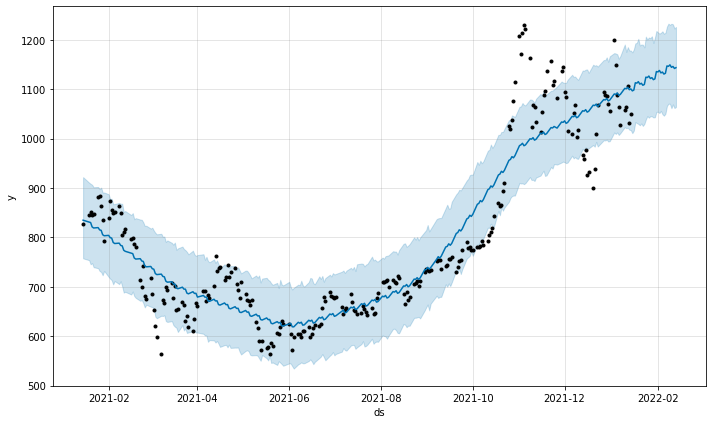

In [54]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

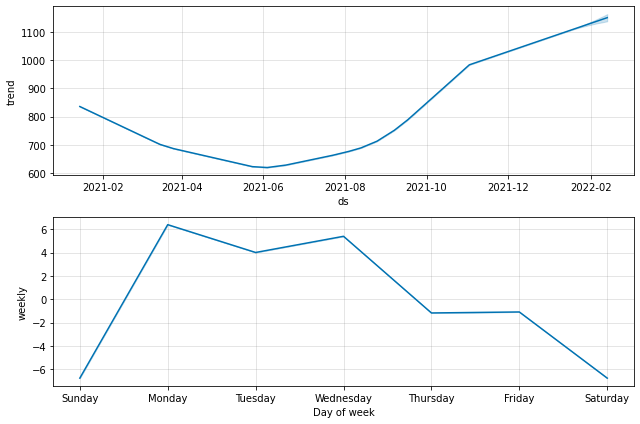

In [55]:
figure=m.plot_components(forecast)

In [56]:
#dowloading tha forecast data
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>